# Project: Investigate a Dataset - TMDb Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **About Dataset**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This dataset will be focused on what variables highly rated and high grossing movies have in common. 

> The columns include:<br>
`id`: The unique identifier for each movie.<br>
`imdb_id`: The unique identifier for each movie on IMDB site.<br>
`popularity`: Popularity for each movie.<br>
`budget`: Movie budget<br>
`revenue`: Movie revenue<br>
`original_title`: Movie title<br>
`cast`: Movie cast<br>
`homepage`: Movie webpage link<br>
`director`: Movie director<br>
`tagline`: Movie tagline<br>
`keywords`: Movie keywords<br>
`overview`: Movie overview<br>
`runtime`: Movie runtimes<br>
`genres`: Movie genres<br>
`production_companies`: Movie production<br>
`release_date`: Date of movive release<br>
`vote_count`: Movie vote count<br>
`vote_average`: Movie vote average<br>
`budget_adj`: Movie budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.<br>
`revenue_adj`: Movie revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
 


### Question(s) for Analysis

> 1) Does popularity determine the ratings or revenue of a movie?<br>
> 2) What genres are highly rated?<br>
> 3) What genres are associated with more popularity and revenue?<br>
> 4) Actors, Directors and Production companies associated with top rated and high revenue movies. <br>
> 5) How does release year affect the market performance of a movie? <br>
> 6) Does high budget relate to high revenue?<br>
> 7) Which genres are most popular from year to year?<br>

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>Here is where we:
>- Gather the data
>- Assess the data
>- Clean the data

In [2]:
# Load your data and print out a few lines.

df = pd.read_csv('tmdb-movies.csv')

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


#### Assessing the data

In [3]:
# Check out the number of rows and columns in the dataset 

df.shape

(10866, 21)

In [4]:
# Assess the summary of each column in the dataset; column name, number of items and type of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Check the statistical summary of the numerical columns in the dataset.

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> From assessing the data, we can see that some columns have null values.<br>
In this section, we will check for duplicates and take them out, then we find a solution to the null value instances.<br>
Some unnecessary columns would be taken out, while some derived columns will be created. <br>
Some datatypes are not appropriate and they will be changed.
  

In [6]:
# Check for duplicates

df.duplicated().sum()

1

In [7]:
# Take out duplicate rows and re-check

df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

#### Creating derived columns and dropping unneeded columns

>New columns like `profit`, `actor`, `genre` and `production_company` will be derived from existing columns. <br>

>Columns like `id`, `imdb_id`, `budget`, `revenue`, `homepage`, `tagline`, `keywords`, `overview`, `genres` and <br>
`production_companies` will be dropped. 

In [8]:
# Create `profit` column
# The Profit column was gotten by getting the difference between revenue and budget 

df['profit'] = df.revenue_adj - df.budget_adj

df.head(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [9]:
# The actor, genre and production_company column are gotten by getting the names before the first '|' character in the cast column.

df['actor']=df.cast.str.split('|', n=1).str.get(0)
df['genre']=df.genres.str.split('|', n=1).str.get(0)
df['production_company']=df['production_companies'].str.split('|', n=1).str.get(0)

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,actor,genre,production_company
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,Action,Universal Studios
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Tom Hardy,Action,Village Roadshow Pictures


In [10]:
# Dropping all unnecessary columns

df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 
         'tagline', 'keywords', 'overview', 'genres', 'production_companies'], 
        axis=1, inplace=True)

In [11]:
df.head(2)

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,actor,genre,production_company
0,32.985763,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,Action,Universal Studios
1,28.419936,Mad Max: Fury Road,George Miller,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Tom Hardy,Action,Village Roadshow Pictures


In [12]:
# Taking another look at the columns with null_values

df.isnull().sum()

popularity               0
original_title           0
director                44
runtime                  0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
profit                   0
actor                   76
genre                   23
production_company    1030
dtype: int64

#### Dealing with null values

>It is observed that all numerical columns are void of null values, while the categorical columns which are strings are the ones with null values. <br> 
So, the null spaces will be filled with the string 'unspecified'.

In [13]:
# Fill the null_values with 'unspecified' and check for null values again.

df[['director','actor','production_company','genre']]=df[['director','actor','production_company','genre']].fillna('unspecified')

df.isnull().sum()

popularity            0
original_title        0
director              0
runtime               0
release_date          0
vote_count            0
vote_average          0
release_year          0
budget_adj            0
revenue_adj           0
profit                0
actor                 0
genre                 0
production_company    0
dtype: int64

#### Data Types

>The data types of each column will be rechecked to ensure the right format of data for all columns.<br>
Anyone found not appropriate will be converted to the correct one.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   popularity          10865 non-null  float64
 1   original_title      10865 non-null  object 
 2   director            10865 non-null  object 
 3   runtime             10865 non-null  int64  
 4   release_date        10865 non-null  object 
 5   vote_count          10865 non-null  int64  
 6   vote_average        10865 non-null  float64
 7   release_year        10865 non-null  int64  
 8   budget_adj          10865 non-null  float64
 9   revenue_adj         10865 non-null  float64
 10  profit              10865 non-null  float64
 11  actor               10865 non-null  object 
 12  genre               10865 non-null  object 
 13  production_company  10865 non-null  object 
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [15]:
type(df['release_date'][1])

str

In [16]:
# It is observed that `release_year` is a string instead of datetime format
# To change release_date to date-time and recheck

df.release_date = pd.to_datetime(df.release_date)

type(df.release_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# Creating the derived column 'release_month' from `release_date'

df['release_month'] = df['release_date'].dt.month

df.head(3)

,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,actor,genre,production_company,release_month
0,32.985763,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Chris Pratt,Action,Universal Studios,6
1,28.419936,Mad Max: Fury Road,George Miller,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Tom Hardy,Action,Village Roadshow Pictures,5
2,13.112507,Insurgent,Robert Schwentke,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Shailene Woodley,Adventure,Summit Entertainment,3


In [18]:
# Assessing the cleaned data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   popularity          10865 non-null  float64       
 1   original_title      10865 non-null  object        
 2   director            10865 non-null  object        
 3   runtime             10865 non-null  int64         
 4   release_date        10865 non-null  datetime64[ns]
 5   vote_count          10865 non-null  int64         
 6   vote_average        10865 non-null  float64       
 7   release_year        10865 non-null  int64         
 8   budget_adj          10865 non-null  float64       
 9   revenue_adj         10865 non-null  float64       
 10  profit              10865 non-null  float64       
 11  actor               10865 non-null  object        
 12  genre               10865 non-null  object        
 13  production_company  10865 non-null  object    

In [19]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10865.000000
mean,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07,6.827612
std,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08,3.441764
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,1.000000
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.000000
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07,10.000000
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,12.000000


<a id='eda'></a>
## Exploratory Data Analysis

Text(0, 0.5, 'No of Movies ')

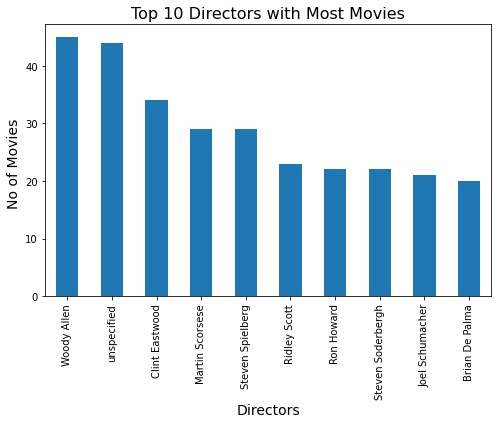

In [20]:
# Which Director has more movies.

dir_count = df['director'].value_counts().head(10)

dir_count.plot(kind='bar', figsize=(8,5))
plt.title('Top 10 Directors with Most Movies', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('No of Movies ', fontsize=14)

Text(0, 0.5, 'No of Movies ')

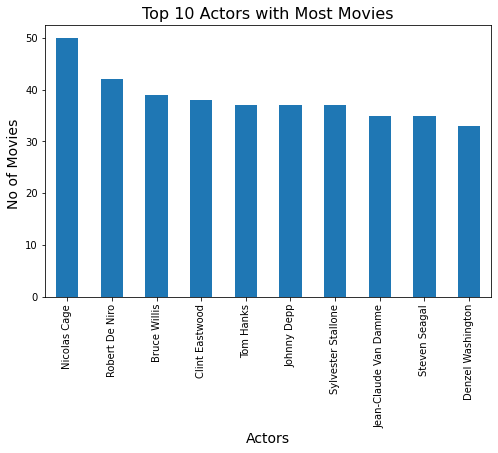

In [21]:
# Which Actor has more movies

dir_count = df['actor'].value_counts().head(11)[1:]

dir_count.plot(kind='bar', figsize=(8,5))
plt.title('Top 10 Actors with Most Movies', fontsize=16)
plt.xlabel('Actors', fontsize=14)
plt.ylabel('No of Movies ', fontsize=14)

Text(0, 0.5, 'Average Ratings')

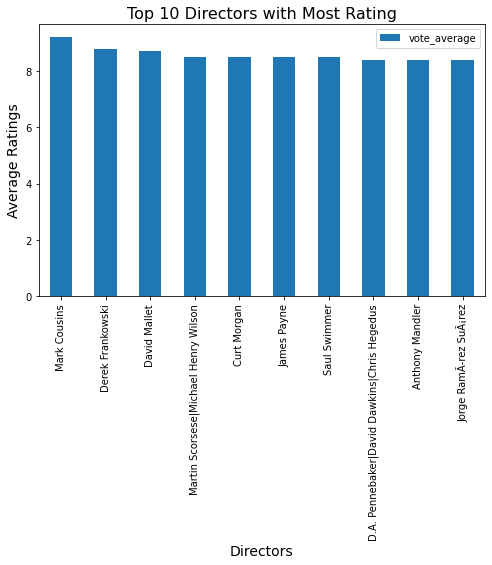

In [22]:
# Top directors with high mean ratings

dir_ratings=df.groupby(['director'], as_index=False)['vote_average'].mean().sort_values('vote_average', ascending=False).head(10)

dir_ratings.plot(x='director', y='vote_average', kind='bar', figsize=(8,5))
plt.title('Top 10 Directors with Most Rating', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Average Ratings', fontsize=14)

Text(0, 0.5, 'Average Ratings')

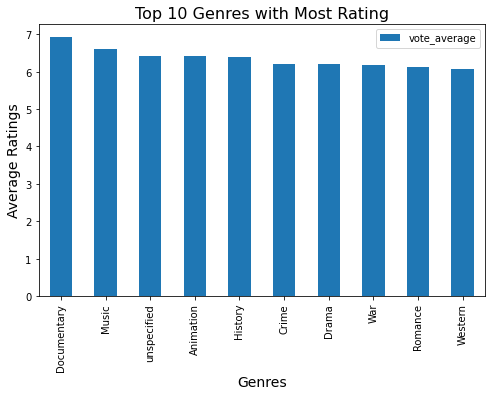

In [23]:
# Genres with the highest average rating

genre_ratings=df.groupby(['genre'], as_index=False)['vote_average'].mean().sort_values('vote_average', ascending=False).head(10)

genre_ratings.plot(x='genre', y='vote_average', kind='bar', figsize=(8,5))
plt.title('Top 10 Genres with Most Rating', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Ratings', fontsize=14)

Text(0, 0.5, 'Average Ratings')

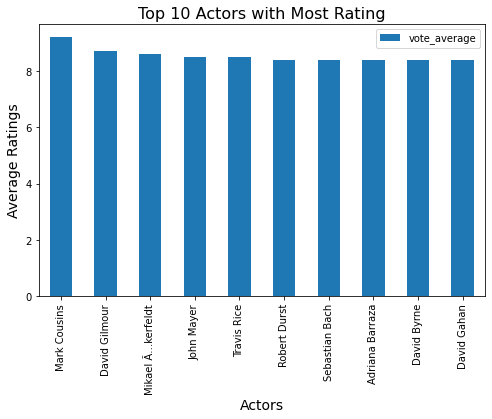

In [24]:
# Top actors with high mean ratings

act_ratings=df.groupby(['actor'], as_index=False)['vote_average'].mean().sort_values('vote_average', ascending=False).head(10)

act_ratings.plot(x='actor', y='vote_average', kind='bar', figsize=(8,5))
plt.title('Top 10 Actors with Most Rating', fontsize=16)
plt.xlabel('Actors', fontsize=14)
plt.ylabel('Average Ratings', fontsize=14)

Text(0, 0.5, 'Average Popularity')

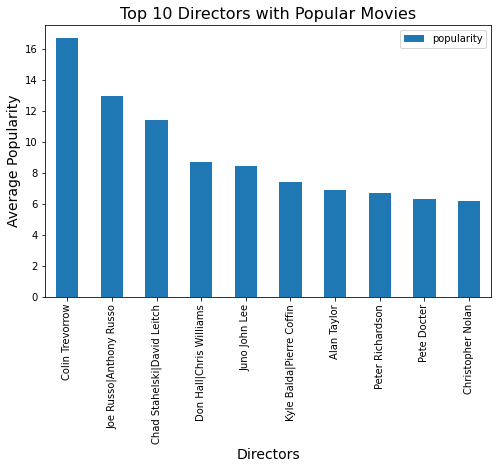

In [25]:
# Directors with more popular movies on an average

dir_pop=df.groupby(['director'], as_index=False)['popularity'].mean().sort_values('popularity', ascending=False).head(10)

dir_pop.plot(x='director', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Directors with Popular Movies', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

Text(0, 0.5, 'Average Popularity')

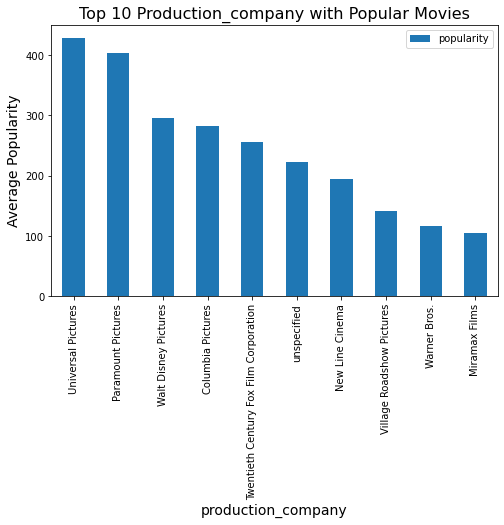

In [61]:
# production_companies with more popular movies on an average

dir_pop=df.groupby(['production_company'], as_index=False)['popularity'].sum().sort_values('popularity', ascending=False).head(10)

dir_pop.plot(x='production_company', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Production_company with Popular Movies', fontsize=16)
plt.xlabel('production_company', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

In [56]:
df['popularity'].mean()

0.6464455549010583

In [55]:
df['vote_average'].mean()

5.975011504832047

Text(0, 0.5, 'Cumm Popularity')

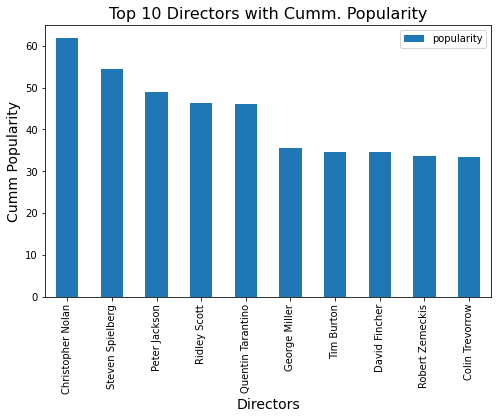

In [26]:
# Directors with popular movies on a cummulative basis

dir_pop_cum=df.groupby(['director'], as_index=False)['popularity'].sum().sort_values('popularity', ascending=False).head(10)

dir_pop_cum.plot(x='director', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Directors with Cumm. Popularity', fontsize=16)
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Cumm Popularity', fontsize=14)

Text(0, 0.5, 'Average Popularity')

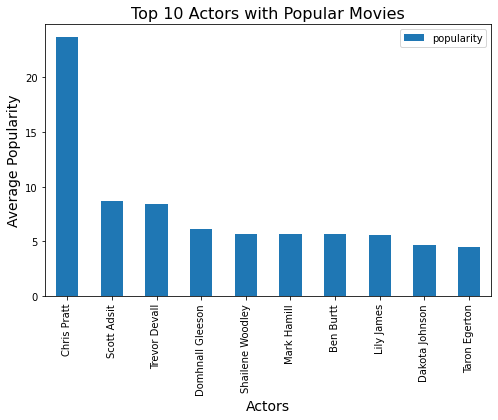

In [27]:
#Actors with more popular movies on an average

act_pop=df.groupby(['actor'], as_index=False)['popularity'].mean().sort_values('popularity', ascending=False).head(10)

act_pop.plot(x='actor', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Actors with Popular Movies', fontsize=16)
plt.xlabel('Actors', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

Text(0, 0.5, 'Cumm Popularity')

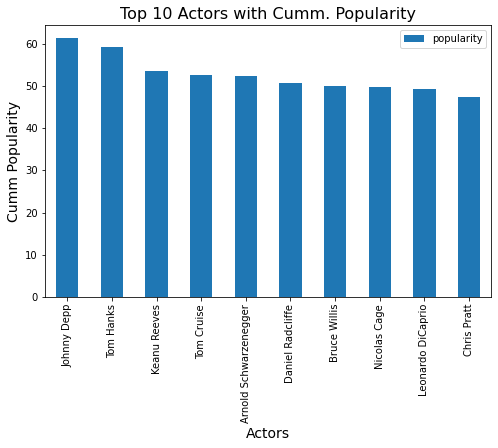

In [28]:
# Actors with popular movies on a cummulative basis

act_pop_cum=df.groupby(['actor'], as_index=False)['popularity'].sum().sort_values('popularity', ascending=False).head(10)

act_pop_cum.plot(x='actor', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Actors with Cumm. Popularity', fontsize=16)
plt.xlabel('Actors', fontsize=14)
plt.ylabel('Cumm Popularity', fontsize=14)

Text(0, 0.5, 'Average Popularity')

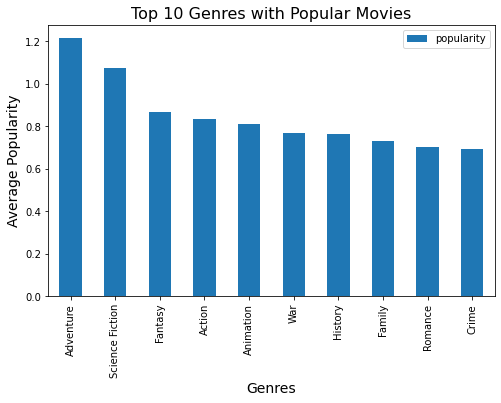

In [29]:
#Genres with more popular movies on an average

genre_pop=df.groupby(['genre'], as_index=False)['popularity'].mean().sort_values('popularity', ascending=False).head(10)

genre_pop.plot(x='genre', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Genres with Popular Movies', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)

Text(0, 0.5, 'Cumm Popularity')

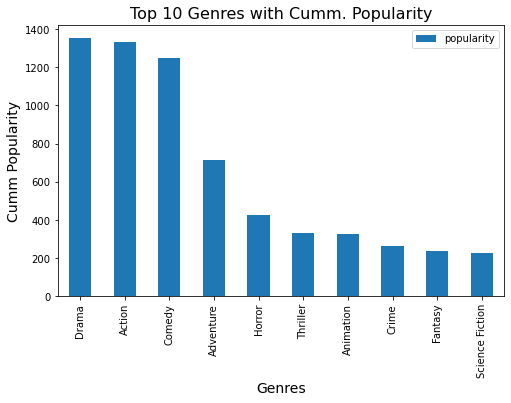

In [30]:
# Genres with popular movies on a cummulative basis

genre_pop_cum=df.groupby(['genre'], as_index=False)['popularity'].sum().sort_values('popularity', ascending=False).head(10)

genre_pop_cum.plot(x='genre', y='popularity', kind='bar', figsize=(8,5))
plt.title('Top 10 Genres with Cumm. Popularity', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Cumm Popularity', fontsize=14)

Text(0, 0.5, 'No of Movies')

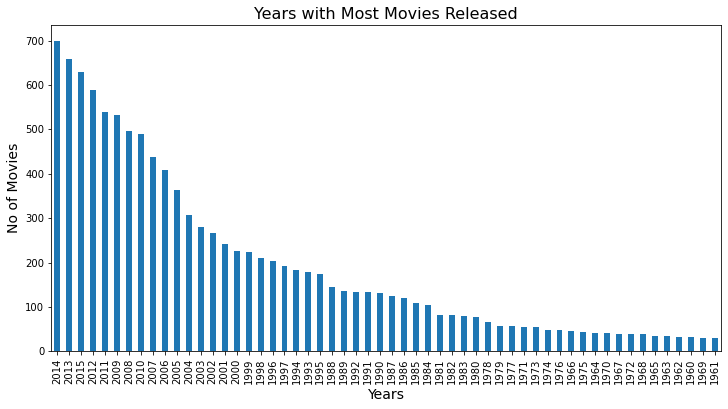

In [31]:
# Quantity of movies produced each year

df['release_year'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Years with Most Movies Released', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)

Text(0, 0.5, 'Vote Average')

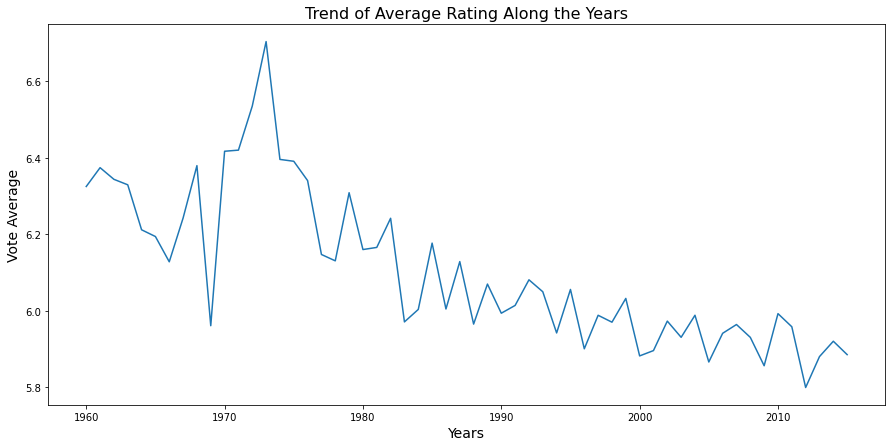

In [32]:
# Trendline of average movie ratings over the years

df.groupby('release_year').mean()['vote_average'].plot(kind='line', figsize=(15,7))
plt.title('Trend of Average Rating Along the Years', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)

Text(0, 0.5, 'Popularity')

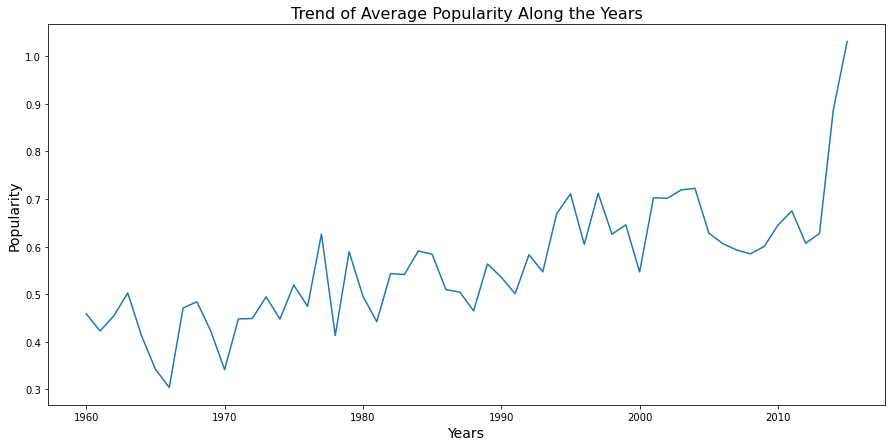

In [33]:
# Trendline of average movie popularity over the years

df.groupby('release_year').mean()['popularity'].plot(kind='line', figsize=(15,7))

plt.title('Trend of Average Popularity Along the Years', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

### NOTE:

> Take note that the data has some `revenue_adj` and `budget_adj` spaces containing 0 values.<br>
Every case of this will result in an incorrect economical record of the movie, which in turn affects the general overview of the data.<br>
To rectify this, we takeaway every of this case and see if what is left is enough to give an wholistic insights.

In [34]:
df_eco =  df[(df['budget_adj']!=0.0) & (df['revenue_adj']!=0.0)]

df_eco.shape

(3854, 15)

> The dataset has been reduced by over 50%. It most likely is not ideal for insights, especially in contrast with the original dataset.<br> But, we'll go ahead to use it for some economic based insghts, even though we don't trust it's integrity.

Text(0, 0.5, 'Profit')

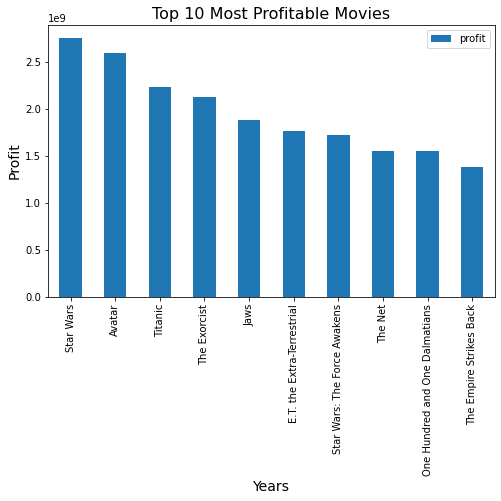

In [35]:
# Most profitable Movies (profit)

top_profit = df_eco.sort_values('profit', ascending=False)[['original_title','profit']].head(10)

top_profit.plot(x='original_title', y='profit', kind='bar', figsize=(8,5))

plt.title('Top 10 Most Profitable Movies', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Profit', fontsize=14)

Text(0, 0.5, 'Budget')

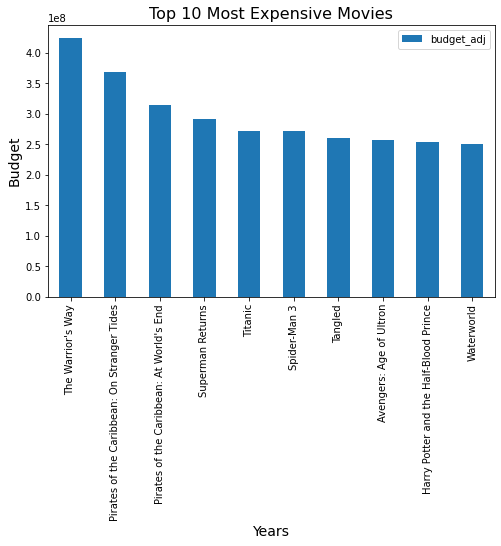

In [36]:
# Most expensive Movies(budget_adj)

top_budget = df_eco.sort_values('budget_adj', ascending=False)[['original_title','budget_adj']].head(10)

top_budget.plot(x='original_title', y='budget_adj', kind='bar', figsize=(8,5))

plt.title('Top 10 Most Expensive Movies', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Budget', fontsize=14)

Text(0, 0.5, 'Revenue')

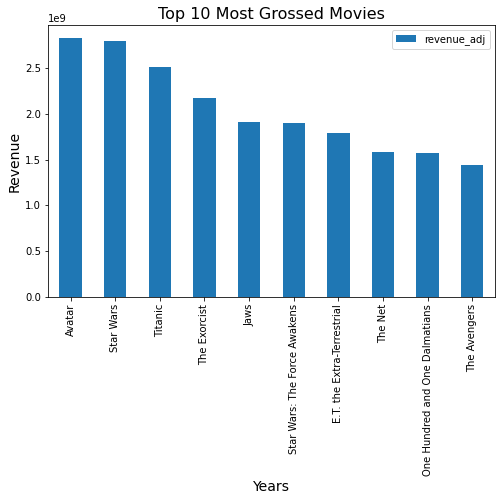

In [37]:
# Highest Grossing Movies(revenue_adj)

top_gross = df_eco.sort_values('revenue_adj', ascending=False)[['original_title','revenue_adj']].head(10)

top_gross.plot(x='original_title', y='revenue_adj', kind='bar', figsize=(8,5))

plt.title('Top 10 Most Grossed Movies', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Revenue', fontsize=14)

Text(0, 0.5, 'Profit')

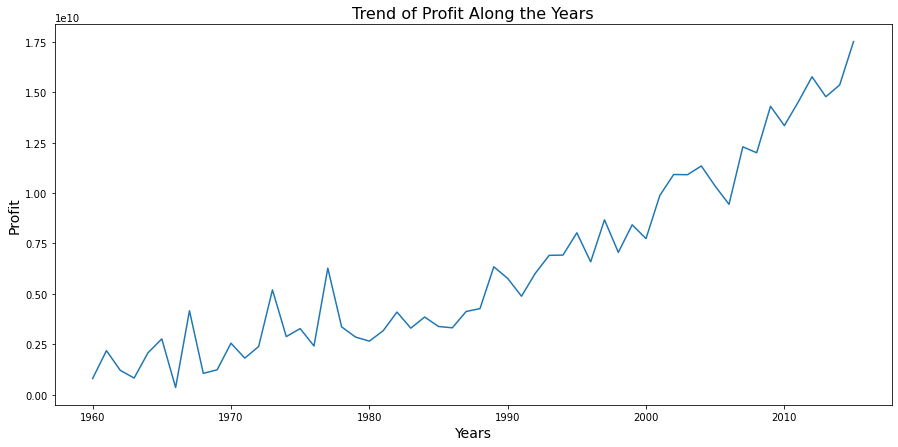

In [38]:
# Trendline of cummulative profit over the years

df_eco.groupby('release_year').sum()['profit'].plot(kind='line', figsize=(15,7))

plt.title('Trend of Profit Along the Years', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Profit', fontsize=14)

Text(0, 0.5, 'Profit')

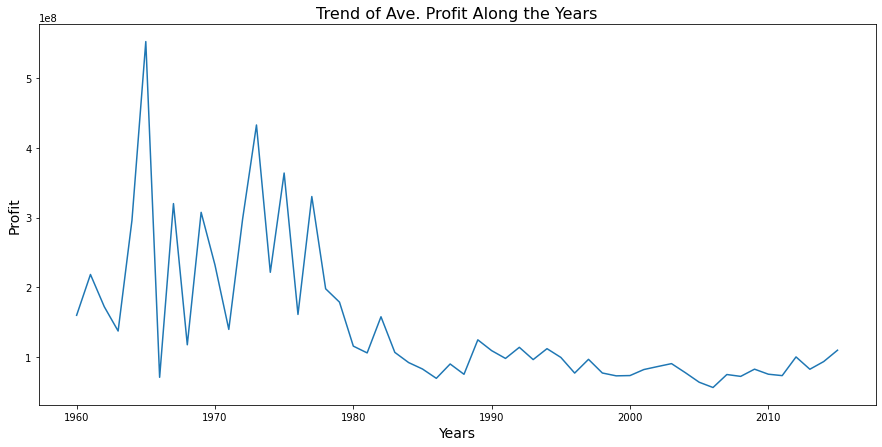

In [39]:
# Trendline of mean profit over the years

df_eco.groupby('release_year').mean()['profit'].plot(kind='line', figsize=(15,7))

plt.title('Trend of Ave. Profit Along the Years', fontsize=16)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Profit', fontsize=14)

### Finding Relationships Between Variables 

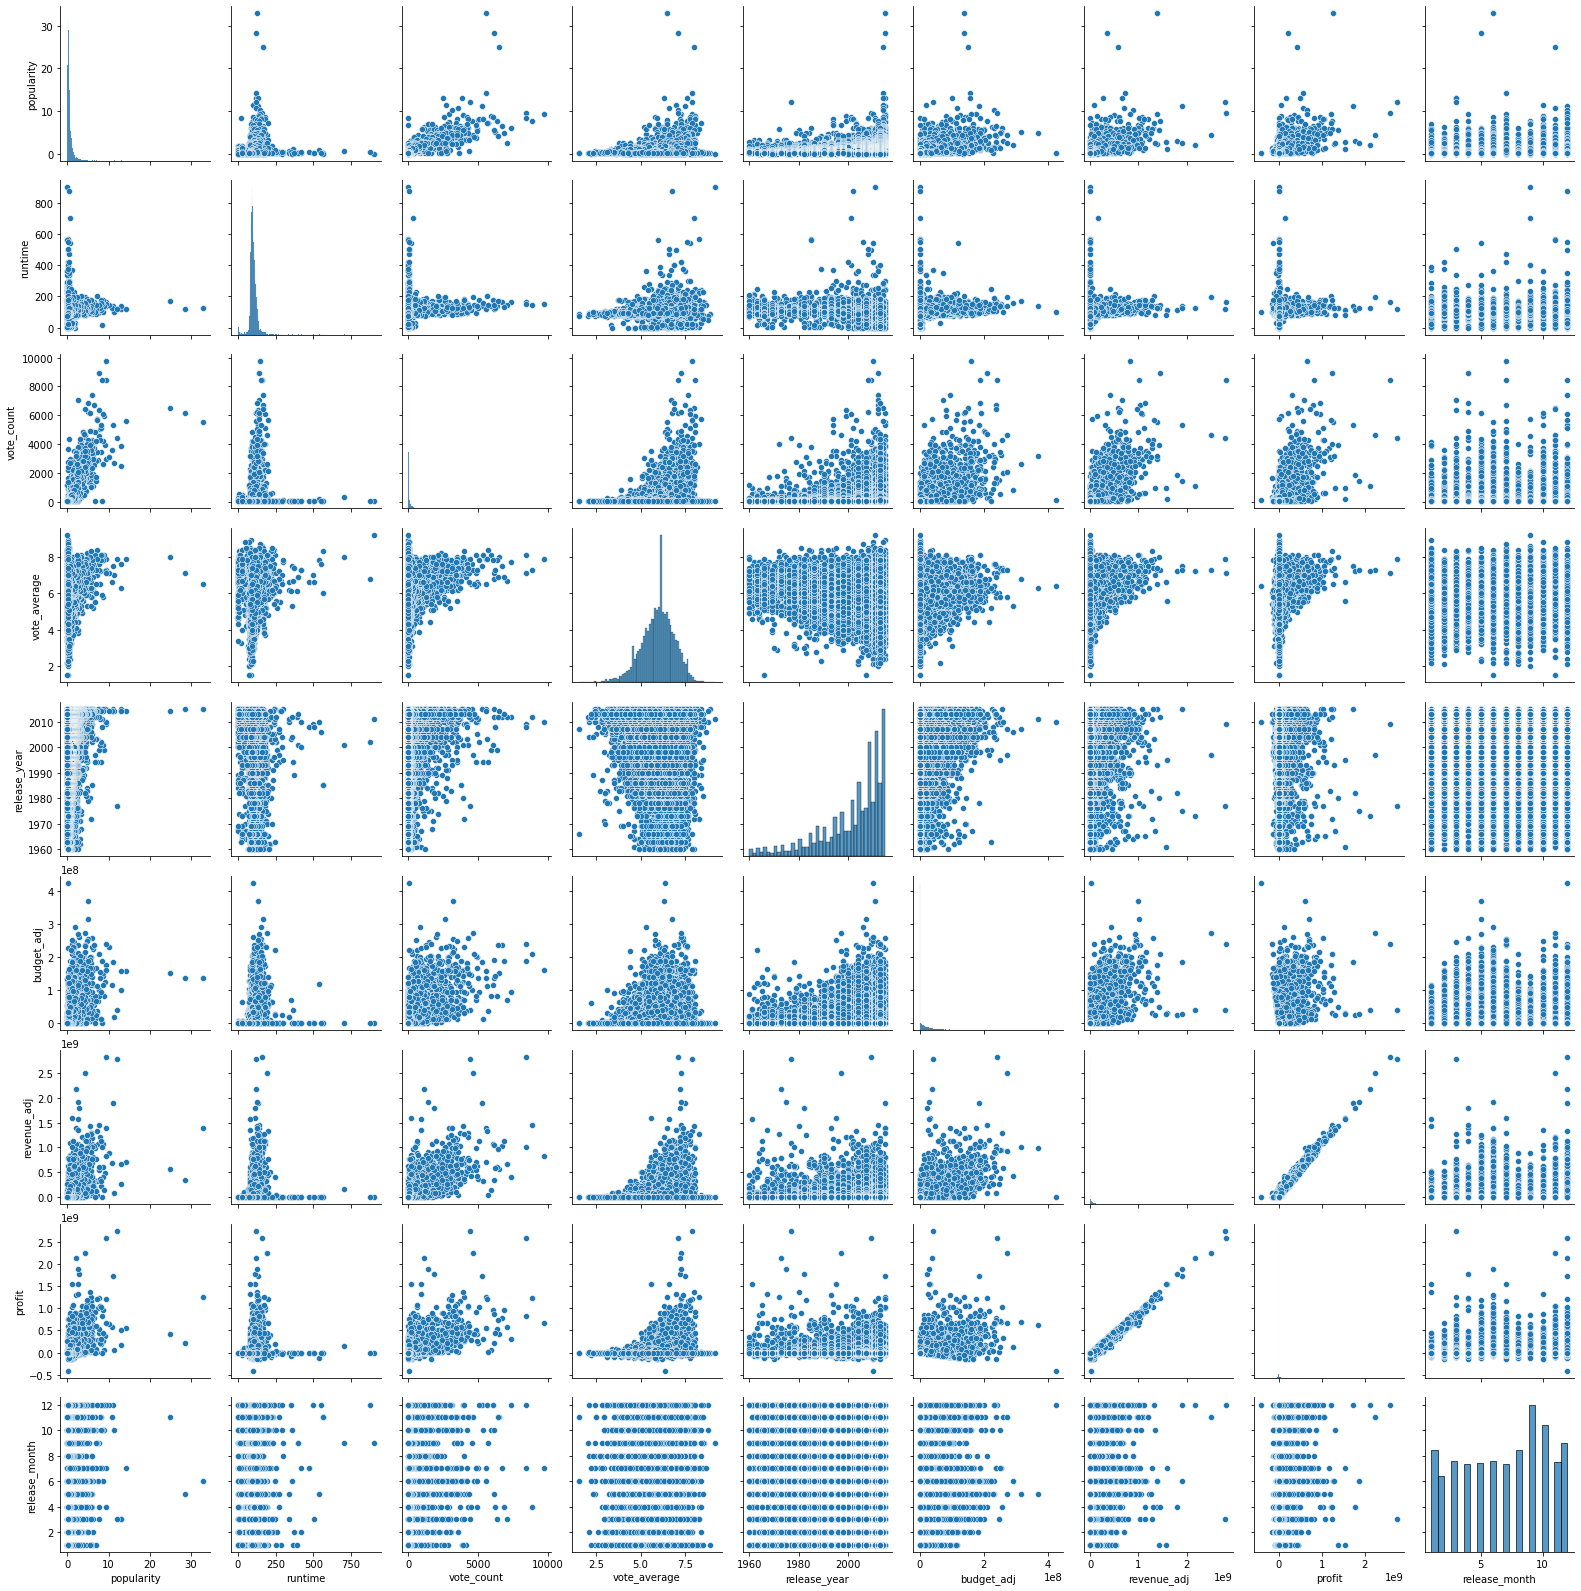

In [40]:
# Take a broad overview through pairplots

sns.pairplot(df)

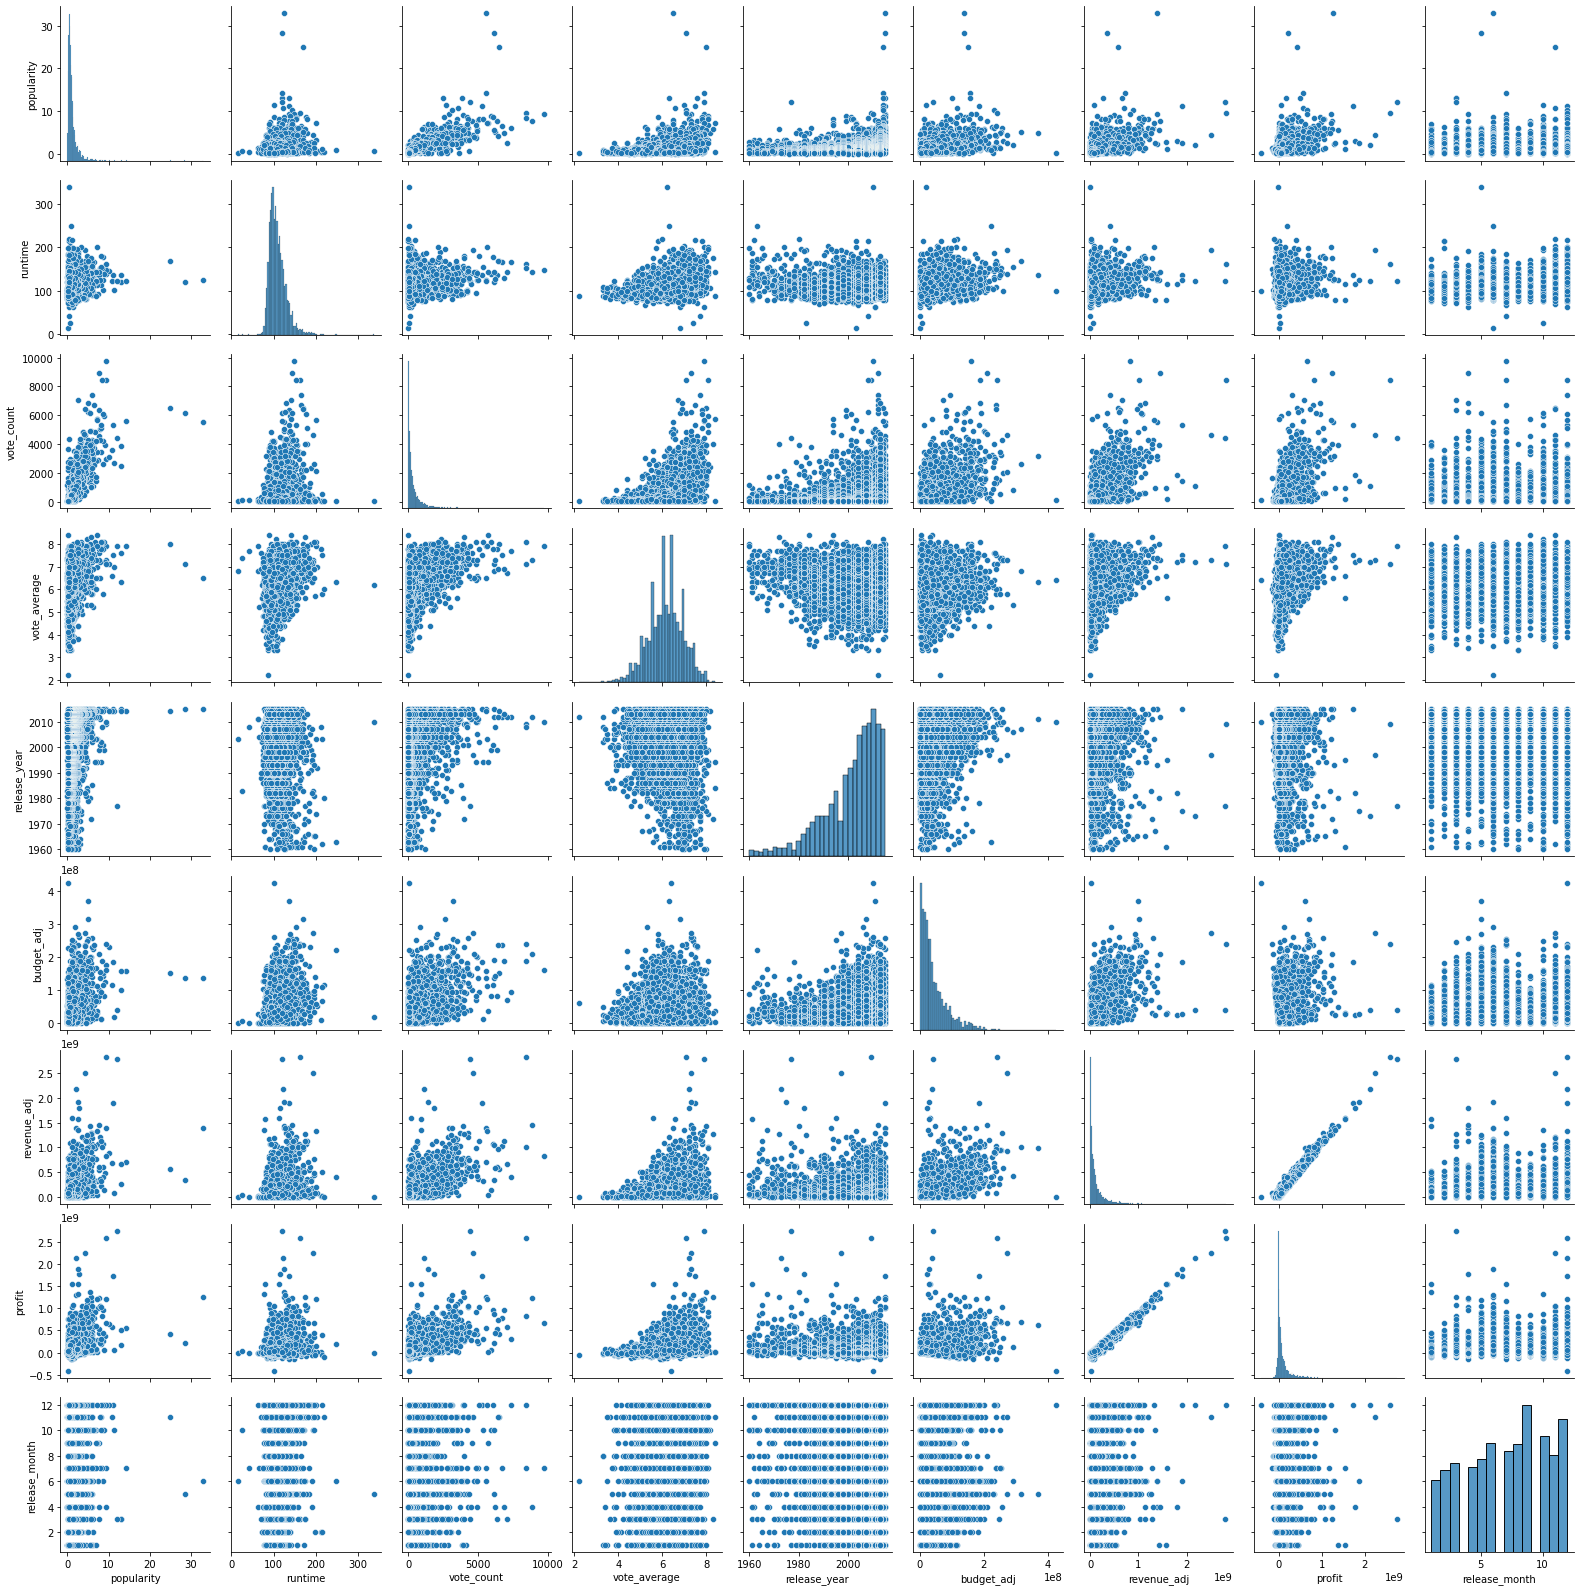

In [41]:
# This is a pairplot to consider a more accurate economic performance of movies.

sns.pairplot(df_eco)

### Which genres are most popular from year to year?

In [64]:
df[['release_year','genre', 'actor']].groupby(['release_year','genre']).count().head(40)

actor
release_year genre                 
1960         Action               8
             Adventure            2
             Comedy               7
             Crime                1
             Drama                5
             Horror               6
             Thriller             3
1961         Action               3
             Adventure            2
             Comedy               8
             Drama                7
             Fantasy              2
             Horror               3
             Music                1
             Romance              1
             Science Fiction      1
             Western              3
1962         Action               5
             Adventure            4
             Comedy               2
             Crime                3
             Drama               11
             Fantasy              1
             Horror               2
             Mystery              1
             Thriller             1
             Western              2
1963         Action               3
             Adventure            5
             Animation            1
             Comedy               9
             Drama                7
             Horror               6
             Mystery              2
             Romance              1
1964         Action               2
             Adventure            5
             Animation            2
             Comedy              10
             Crime                5

### What kinds of properties are associated with movies that have high revenues?

In [44]:
# The movies with high revenues 

df_high = df[df['revenue_adj']>=df['revenue_adj'].mean()]

df_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   popularity          2261 non-null   float64       
 1   original_title      2261 non-null   object        
 2   director            2261 non-null   object        
 3   runtime             2261 non-null   int64         
 4   release_date        2261 non-null   datetime64[ns]
 5   vote_count          2261 non-null   int64         
 6   vote_average        2261 non-null   float64       
 7   release_year        2261 non-null   int64         
 8   budget_adj          2261 non-null   float64       
 9   revenue_adj         2261 non-null   float64       
 10  profit              2261 non-null   float64       
 11  actor               2261 non-null   object        
 12  genre               2261 non-null   object        
 13  production_company  2261 non-null   object     

Text(0, 0.5, 'No of Movies')

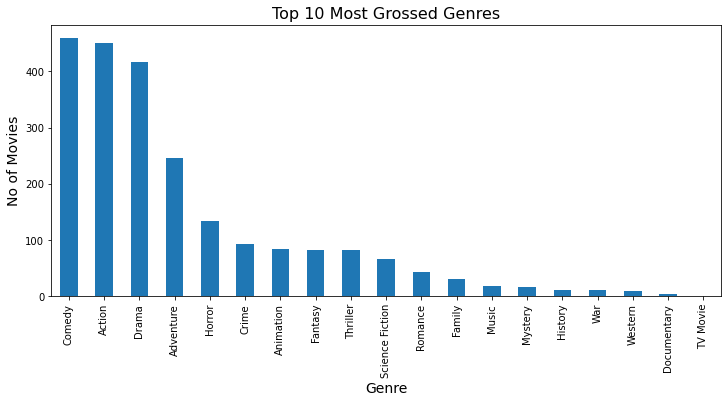

In [68]:
df_high['genre'].value_counts().plot(kind='bar', figsize=(12,5))

plt.title('Top 10 Most Grossed Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)

In [45]:
df_high.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,2261.000000,2261.00000,2261.000000,2261.000000,2261.000000,2.261000e+03,2.261000e+03,2.261000e+03,2261.000000
mean,1.557742,113.05617,772.407784,6.306369,1999.214065,5.830409e+07,2.282261e+08,1.699220e+08,7.232198
std,1.767902,24.06729,1051.490409,0.735536,12.460245,5.049916e+07,2.461158e+08,2.259461e+08,3.364514
min,0.010335,44.00000,10.000000,3.400000,1960.000000,0.000000e+00,5.152769e+07,-1.551102e+08,1.000000
25%,0.665367,98.00000,164.000000,5.800000,1992.000000,2.203826e+07,8.361457e+07,5.148183e+07,5.000000
50%,1.102836,110.00000,379.000000,6.300000,2002.000000,4.466253e+07,1.421194e+08,9.588923e+07,7.000000
75%,1.832434,124.00000,929.000000,6.800000,2009.000000,8.102293e+07,2.682159e+08,1.993909e+08,10.000000
max,32.985763,705.00000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2.750137e+09,12.000000


In [63]:
# Most movies with high revenue have their vote_average above the general vote_average

df.vote_average.mean()

5.975011504832047

In [62]:
# Most movies with high revenue have their popularity_ratings above the general popularity average

df.popularity.mean()

0.6464455549010583

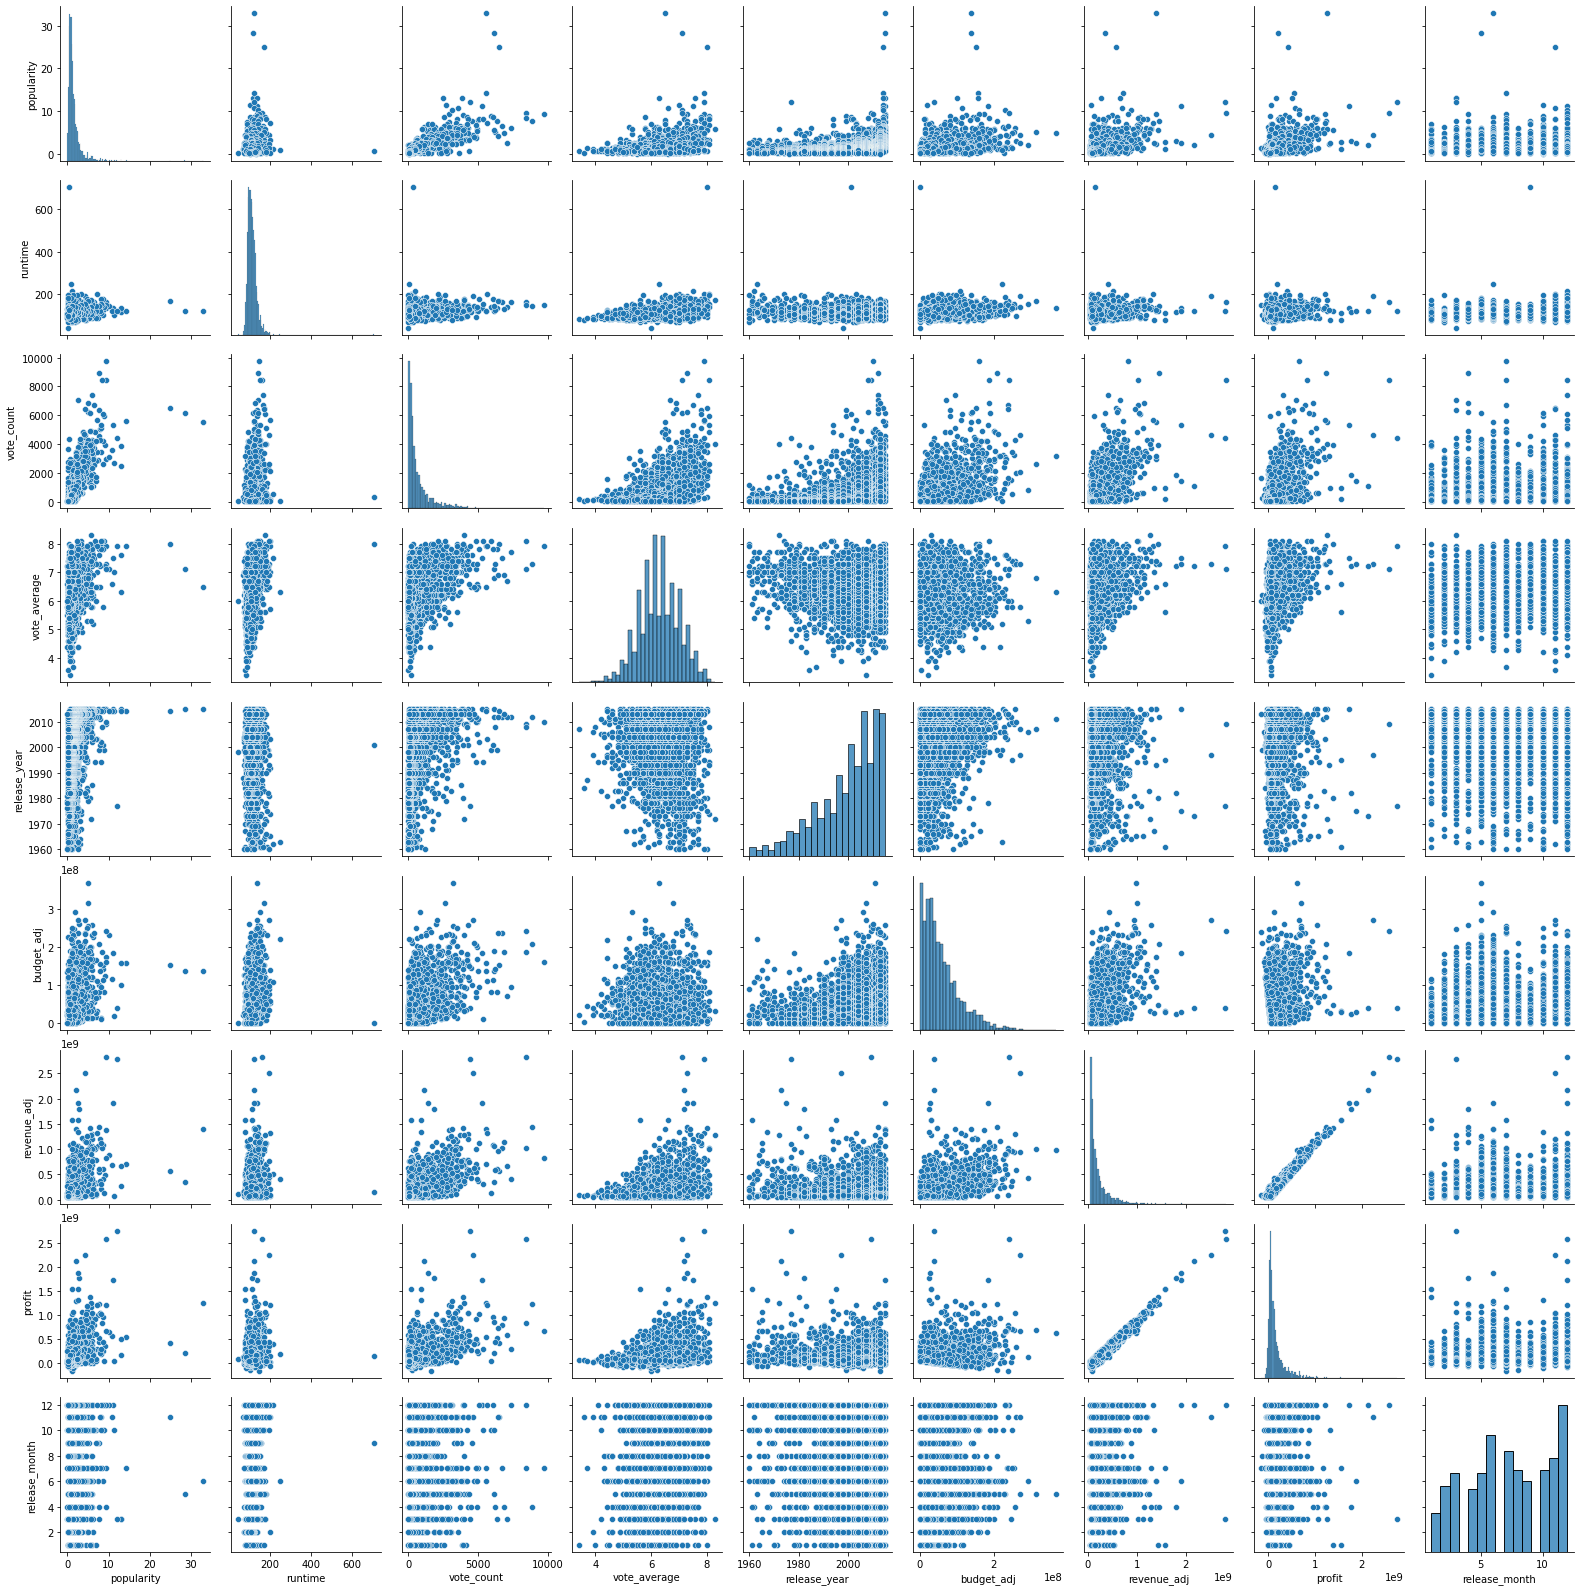

In [46]:
sns.pairplot(df_high)

Text(0, 0.5, 'No of Movies')

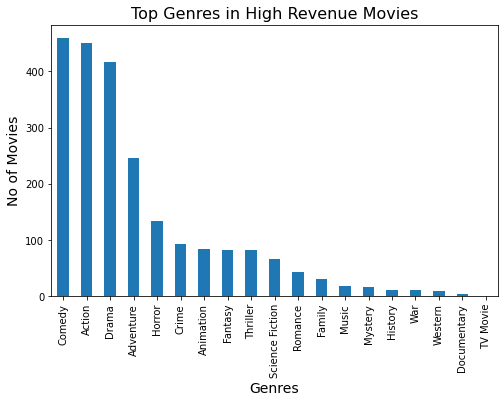

In [47]:
# Most genres in the high revenue movies 

df_high['genre'].value_counts().plot(kind='bar', figsize=(8,5))

plt.title('Top Genres in High Revenue Movies', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)

Text(0, 0.5, 'No of Movies')

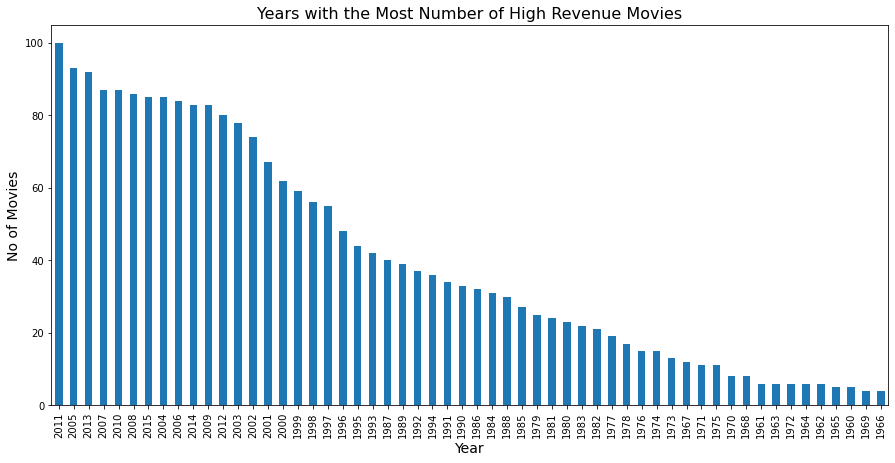

In [49]:
df_high['release_year'].value_counts().plot(kind='bar', figsize=(15,7))

plt.title('Years with the Most Number of High Revenue Movies', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)

In [50]:
df_low = df[df['revenue_adj']<=df['revenue_adj'].mean()]

df_low.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8.604000e+03,8.604000e+03,8.604000e+03,8604.000000
mean,0.406971,99.185263,71.551953,5.887936,2001.875755,6.840312e+06,4.893656e+06,-1.946655e+06,6.721292
std,0.408321,32.426934,160.550302,0.962158,12.847880,1.628484e+07,1.119282e+07,1.555207e+07,3.454116
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,1.000000
25%,0.175790,89.000000,15.000000,5.300000,1995.750000,0.000000e+00,0.000000e+00,-3.911485e+05,4.000000
50%,0.311120,96.000000,26.000000,5.900000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.000000
75%,0.507358,108.000000,63.000000,6.600000,2012.000000,5.526546e+06,6.792659e+05,0.000000e+00,10.000000
max,8.411577,900.000000,5754.000000,9.200000,2015.000000,4.250000e+08,5.129772e+07,5.108839e+07,12.000000


Text(0, 0.5, 'No of Movies')

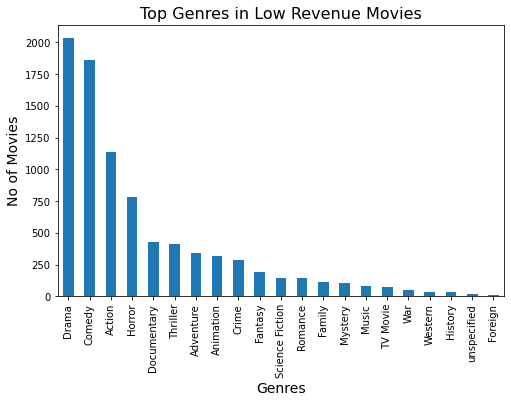

In [51]:
# Most genres in the low revenue movies 

df_low['genre'].value_counts().plot(kind='bar', figsize=(8,5))

plt.title('Top Genres in Low Revenue Movies', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)

<a id='conclusions'></a>
## Conclusions:
> Actors, directors and production companies that do more movies above the popularity and rating average are more profitable.
Popularity of movies increase over the years.
Profit and revenue increases per year mainly because of the increased number of movies released per year.
The average quality of movies released declined over the years.
The average budget for movies have reduced relatively over the years. That could be related to the fact that more low budget movies were released as the years become more recent.


>Most movies with high revenues have vote averages and popularity ratings above the general averages.
Comedy, Action and Drama seems to be the most common genres and also the most profitable 